In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('C:/Network_traffic.csv')

In [5]:
df.isna().sum()

date     0
l_ipn    0
r_asn    0
f        0
dtype: int64

In [6]:
df

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1
...,...,...,...,...
20798,2006-09-30,8,36351,3
20799,2006-09-30,8,36856,4
20800,2006-09-30,9,2152,1
20801,2006-09-30,9,8070,1


In [7]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])


In [8]:
df

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1
...,...,...,...,...
20798,2006-09-30,8,36351,3
20799,2006-09-30,8,36856,4
20800,2006-09-30,9,2152,1
20801,2006-09-30,9,8070,1


In [9]:
# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['r_asn'])


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features using Min-Max scaling
scaler = MinMaxScaler()
df[['f']] = scaler.fit_transform(df[['f']])


In [11]:
# Set 'date' as the index
df.set_index('date', inplace=True)

# Sort the data based on timestamps
df.sort_index(inplace=True)

In [13]:
df

,l_ipn,f,r_asn_3,r_asn_4,r_asn_8,r_asn_9,r_asn_11,r_asn_12,r_asn_14,r_asn_16,...,r_asn_37945,r_asn_38083,r_asn_39386,r_asn_39484,r_asn_39561,r_asn_39570,r_asn_39632,r_asn_39834,r_asn_40028,r_asn_40092
date,,,,,,,,,,,,,,,,,,,,,
2006-07-01,0,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-07-01,0,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-07-01,0,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-07-01,0,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-07-01,0,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-09-30,8,0.000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-09-30,8,0.000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-09-30,9,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Using the first 80% of data for training and the remaining 20% for testing
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]


In [15]:
#Using 'f' as the target variable
X_train, y_train = train.drop('f', axis=1), train['f']
X_test, y_test = test.drop('f', axis=1), test['f']


In [16]:
# Reshape for LSTM input (assuming a single feature)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [18]:
#Training the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(1, X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/50
521/521 [==============================] - 13s 15ms/step - loss: 2.6768e-05 - val_loss: 2.9455e-04
Epoch 2/50
521/521 [==============================] - 7s 13ms/step - loss: 1.5967e-05 - val_loss: 2.8533e-04
Epoch 3/50
521/521 [==============================] - 7s 13ms/step - loss: 9.5523e-06 - val_loss: 2.7749e-04
Epoch 4/50
521/521 [==============================] - 7s 13ms/step - loss: 4.1466e-06 - val_loss: 2.7661e-04
Epoch 5/50
521/521 [==============================] - 7s 13ms/step - loss: 2.1698e-06 - val_loss: 2.7450e-04
Epoch 6/50
521/521 [==============================] - 7s 14ms/step - loss: 1.7117e-06 - val_loss: 2.7444e-04
Epoch 7/50
521/521 [==============================] - 7s 14ms/step - loss: 1.7176e-06 - val_loss: 2.7316e-04
Epoch 8/50
521/521 [==============================] - 7s 14ms/step - loss: 1.4326e-06 - val_loss: 2.7281e-04
Epoch 9/50
521/521 [==============================] - 8s 15ms/step - loss: 1.1993e-06 - val_loss: 2.7247e-04
Epoch 10/50
521/52

In [19]:
#Evaluating Lstm
y_pred_lstm = lstm_model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'MSE for LSTM: {mse_lstm}')


131/131 [==============================] - 1s 4ms/step
MSE for LSTM: 0.0002698374207416508


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict using the trained LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Flatten the predictions and true values (assuming a single output neuron)
y_pred_lstm_flat = y_pred_lstm.flatten()
y_test_flat = y_test.values

# Calculate Mean Absolute Error (MAE)
mae_lstm = mean_absolute_error(y_test_flat, y_pred_lstm_flat)
print(f'MAE for LSTM: {mae_lstm}')

# Calculate Root Mean Squared Error (RMSE)
rmse_lstm = np.sqrt(mean_squared_error(y_test_flat, y_pred_lstm_flat))
print(f'RMSE for LSTM: {rmse_lstm}')


131/131 [==============================] - 1s 4ms/step
MAE for LSTM: 0.00046647102456851865
RMSE for LSTM: 0.0164267288509201


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Create an RNN model
rnn_model = Sequential()

# Add a SimpleRNN layer with 50 units
rnn_model.add(SimpleRNN(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))

# Add a Dense output layer
rnn_model.add(Dense(1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mse')

# Train the RNN model
rnn_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))


Epoch 1/50
521/521 [==============================] - 4s 6ms/step - loss: 8.0216e-04 - val_loss: 0.0011
Epoch 2/50
521/521 [==============================] - 3s 5ms/step - loss: 5.1772e-04 - val_loss: 6.6772e-04
Epoch 3/50
521/521 [==============================] - 2s 5ms/step - loss: 2.6198e-04 - val_loss: 6.6111e-04
Epoch 4/50
521/521 [==============================] - 2s 5ms/step - loss: 1.2637e-04 - val_loss: 4.4805e-04
Epoch 5/50
521/521 [==============================] - 3s 5ms/step - loss: 7.6963e-05 - val_loss: 4.0962e-04
Epoch 6/50
521/521 [==============================] - 3s 5ms/step - loss: 7.9634e-05 - val_loss: 4.2208e-04
Epoch 7/50
521/521 [==============================] - 2s 5ms/step - loss: 7.8621e-05 - val_loss: 4.8393e-04
Epoch 8/50
521/521 [==============================] - 3s 5ms/step - loss: 6.1362e-05 - val_loss: 3.6462e-04
Epoch 9/50
521/521 [==============================] - 2s 5ms/step - loss: 4.8998e-05 - val_loss: 3.5962e-04
Epoch 10/50
521/521 [===========

In [22]:
y_pred_rnn = rnn_model.predict(X_test_lstm)

# Flatten the predictions and true values (assuming a single output neuron)
y_pred_rnn_flat = y_pred_rnn.flatten()

# Calculate Mean Squared Error (MSE)
mse_rnn = mean_squared_error(y_test_flat, y_pred_rnn_flat)
print(f'MSE for RNN: {mse_rnn}')

131/131 [==============================] - 1s 3ms/step
MSE for RNN: 0.00026992960485521054


In [23]:
# Predict using the trained RNN model
y_pred_rnn = rnn_model.predict(X_test_lstm)

# Flatten the predictions
y_pred_rnn_flat = y_pred_rnn.flatten()

# Calculate Mean Absolute Error (MAE)
mae_rnn = mean_absolute_error(y_test_flat, y_pred_rnn_flat)
print(f'MAE for RNN: {mae_rnn}')

# Calculate Root Mean Squared Error (RMSE)
rmse_rnn = np.sqrt(mean_squared_error(y_test_flat, y_pred_rnn_flat))
print(f'RMSE for RNN: {rmse_rnn}')


131/131 [==============================] - 0s 3ms/step
MAE for RNN: 0.0006376748001386294
RMSE for RNN: 0.016429534529474977


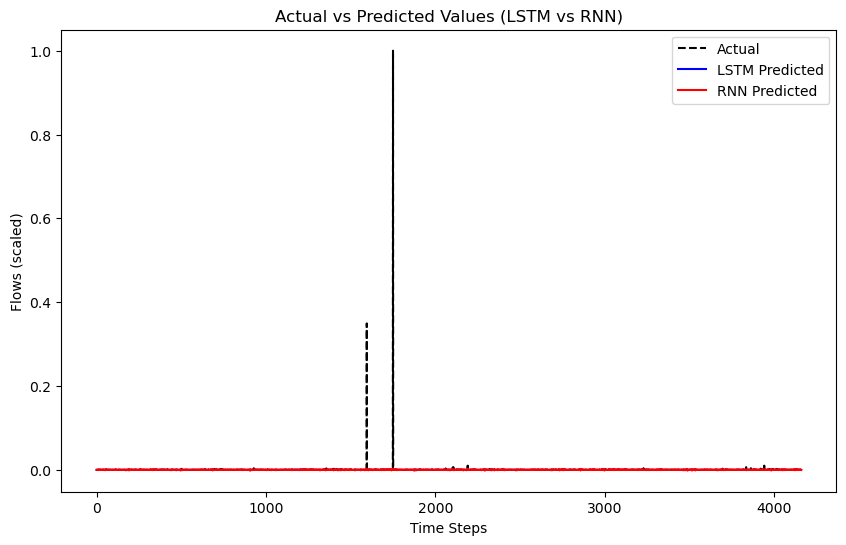

In [24]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for LSTM and RNN
plt.figure(figsize=(10, 6))

# Actual values
plt.plot(y_test_flat, label='Actual', color='black', linestyle='dashed')

# LSTM predictions
plt.plot(y_pred_lstm_flat, label='LSTM Predicted', color='blue')

# RNN predictions
plt.plot(y_pred_rnn_flat, label='RNN Predicted', color='red')

plt.title('Actual vs Predicted Values (LSTM vs RNN)')
plt.xlabel('Time Steps')
plt.ylabel('Flows (scaled)')
plt.legend()
plt.show()


In [37]:
print(f"\nLSTM Metrics:")
print(f"MSE: {mse_lstm}")
print(f"MAE: {mae_lstm}")
print(f"RMSE: {rmse_lstm}")

print(f"\nRNN Metrics:")
print(f"MSE: {mse_rnn}")
print(f"MAE: {mae_rnn}")
print(f"RMSE: {rmse_rnn}")


LSTM Metrics:
MSE: 0.0002698374207416508
MAE: 0.00046647102456851865
RMSE: 0.0164267288509201

RNN Metrics:
MSE: 0.00026992960485521054
MAE: 0.0006376748001386294
RMSE: 0.016429534529474977
